<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/cis2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Encuesta CIS 2019

Analizareos la encuesta postelectoral del CIS en 2019

In [1]:
# Librerias

import pandas as pd   # Tratamiento dataframes
import numpy as np # Mates
import matplotlib.pyplot as plt #Gráficas
import seaborn as sns #Gráficas aún más chulas
import scipy # Estadísticas, ciencia

In [2]:
nombre_fichero = "/content/datos estudio CIS filtrado.csv"

In [3]:
voto=pd.read_csv(nombre_fichero, sep=";")
voto.head(3)

,ESTU,CUES,CCAA,PROV,MUN,TAMUNI,CAPITAL,DISTR,SECCION,ENTREV,Nacionalidad,SitEconomica,SitEcoAnt,SitEcoFut,SitEcoPers,SitEcoPersFutu,SitPol,SitPolAnt,SitPolFut,Problema1,Problema2,Problema3,ProPers1,ProPers2,ProPers3,Ideologia1,Ideologia2,IdeoPSOE,IdeoPP,IdeoVox,IdeoPodemos,IdeoIU,IdeoCs,IdeoMP,InteresPol,interesCampa,DemocraciaoAuto,SitEcopostelecc,Vecinal,Protesta,...,C15,C16,C17,C17A,C18,C19,C20,C21,TELF,MEDITA,COMPRENS,TARJETAS,LUGAR,ABANDONO_1,MOLESTIA_1,PRISA_1,LONGITUD_4,DESARROLLO,TERCERASPERSONAS,INTERVENCION,FECHAINI,HORAINI,FECHAFIN,HORAFIN,DURACION,B9IMPRESA,B9DIGITAL,B9TV,B9RADIO,B21ACOM,B22R,C1R,C1AR,VOTOSIMG,C7AR,RECUERDO,ESTUDIOS,RAMA09,CLASESUB,PESO
0,3269,3,1,11,0,4,3,0,0,0,1,2,1,2,3,1,4,3,2,1,11,19,1,8,98,98,99,98,98,98,98,98,98,98,4,2,1,2,2,2,...,1,5,2,1,1,6,4,2,1,1,1,1,1,#¡NULO!,#¡NULO!,#¡NULO!,#¡NULO!,1,2,0,29/11/2019,11:01:23,29/11/2019,11:16:37,913,#¡NULO!,#¡NULO!,1,#¡NULO!,0,2,2,98,2,2,2,2,1,1,"1,24754"
1,3269,6,13,28,0,4,3,0,0,0,2,3,1,8,3,1,8,8,8,98,99,99,1,98,99,4,10,98,98,98,98,98,98,98,3,3,1,2,2,2,...,7,9,1,3,6,99,99,3,1,2,2,5,2,#¡NULO!,#¡NULO!,1,#¡NULO!,3,2,0,29/11/2019,10:53:03,29/11/2019,11:08:40,936,#¡NULO!,#¡NULO!,1,#¡NULO!,0,18,18,2,18,98,98,3,3,2,"1,27710"
2,3269,7,13,28,0,4,3,0,0,0,1,4,3,3,3,1,4,3,3,18,1,98,1,18,23,1,3,6,7,8,6,6,7,6,4,4,1,4,2,2,...,1,4,1,3,7,7,5,5,1,2,1,5,2,#¡NULO!,#¡NULO!,#¡NULO!,#¡NULO!,2,2,0,29/11/2019,11:20:02,29/11/2019,11:37:00,1017,#¡NULO!,#¡NULO!,1,#¡NULO!,250,50,50,97,50,2,2,5,4,4,"1,27710"


In [4]:
voto.shape

(2863, 306)

In [5]:
voto.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
voto.dropna(inplace=True) 
  

In [6]:
voto.dtypes

ESTU         int64
CUES         int64
CCAA         int64
PROV         int64
MUN          int64
             ...  
RECUERDO     int64
ESTUDIOS     int64
RAMA09       int64
CLASESUB     int64
PESO        object
Length: 306, dtype: object

In [7]:
# Comprobar cuantos valores NAs hay
voto.isnull().sum()

ESTU        0
CUES        0
CCAA        0
PROV        0
MUN         0
           ..
RECUERDO    0
ESTUDIOS    0
RAMA09      0
CLASESUB    0
PESO        0
Length: 306, dtype: int64

In [8]:
# Limpieza de la BBDD: borrar duplicados y cambio de nombres
# Sería conveniente especificar cuántas filas se han eliminado por duplicadas y
# la causa
voto=voto.drop_duplicates()
voto.dropna()

voto.shape

(2863, 306)

In [9]:
voto.head(3)

,ESTU,CUES,CCAA,PROV,MUN,TAMUNI,CAPITAL,DISTR,SECCION,ENTREV,Nacionalidad,SitEconomica,SitEcoAnt,SitEcoFut,SitEcoPers,SitEcoPersFutu,SitPol,SitPolAnt,SitPolFut,Problema1,Problema2,Problema3,ProPers1,ProPers2,ProPers3,Ideologia1,Ideologia2,IdeoPSOE,IdeoPP,IdeoVox,IdeoPodemos,IdeoIU,IdeoCs,IdeoMP,InteresPol,interesCampa,DemocraciaoAuto,SitEcopostelecc,Vecinal,Protesta,...,C15,C16,C17,C17A,C18,C19,C20,C21,TELF,MEDITA,COMPRENS,TARJETAS,LUGAR,ABANDONO_1,MOLESTIA_1,PRISA_1,LONGITUD_4,DESARROLLO,TERCERASPERSONAS,INTERVENCION,FECHAINI,HORAINI,FECHAFIN,HORAFIN,DURACION,B9IMPRESA,B9DIGITAL,B9TV,B9RADIO,B21ACOM,B22R,C1R,C1AR,VOTOSIMG,C7AR,RECUERDO,ESTUDIOS,RAMA09,CLASESUB,PESO
0,3269,3,1,11,0,4,3,0,0,0,1,2,1,2,3,1,4,3,2,1,11,19,1,8,98,98,99,98,98,98,98,98,98,98,4,2,1,2,2,2,...,1,5,2,1,1,6,4,2,1,1,1,1,1,#¡NULO!,#¡NULO!,#¡NULO!,#¡NULO!,1,2,0,29/11/2019,11:01:23,29/11/2019,11:16:37,913,#¡NULO!,#¡NULO!,1,#¡NULO!,0,2,2,98,2,2,2,2,1,1,"1,24754"
1,3269,6,13,28,0,4,3,0,0,0,2,3,1,8,3,1,8,8,8,98,99,99,1,98,99,4,10,98,98,98,98,98,98,98,3,3,1,2,2,2,...,7,9,1,3,6,99,99,3,1,2,2,5,2,#¡NULO!,#¡NULO!,1,#¡NULO!,3,2,0,29/11/2019,10:53:03,29/11/2019,11:08:40,936,#¡NULO!,#¡NULO!,1,#¡NULO!,0,18,18,2,18,98,98,3,3,2,"1,27710"
2,3269,7,13,28,0,4,3,0,0,0,1,4,3,3,3,1,4,3,3,18,1,98,1,18,23,1,3,6,7,8,6,6,7,6,4,4,1,4,2,2,...,1,4,1,3,7,7,5,5,1,2,1,5,2,#¡NULO!,#¡NULO!,#¡NULO!,#¡NULO!,2,2,0,29/11/2019,11:20:02,29/11/2019,11:37:00,1017,#¡NULO!,#¡NULO!,1,#¡NULO!,250,50,50,97,50,2,2,5,4,4,"1,27710"


In [10]:
# Miramos los valores únicos de las variables categóricas
voto.describe(include="all")

voto.sample(5)

,ESTU,CUES,CCAA,PROV,MUN,TAMUNI,CAPITAL,DISTR,SECCION,ENTREV,Nacionalidad,SitEconomica,SitEcoAnt,SitEcoFut,SitEcoPers,SitEcoPersFutu,SitPol,SitPolAnt,SitPolFut,Problema1,Problema2,Problema3,ProPers1,ProPers2,ProPers3,Ideologia1,Ideologia2,IdeoPSOE,IdeoPP,IdeoVox,IdeoPodemos,IdeoIU,IdeoCs,IdeoMP,InteresPol,interesCampa,DemocraciaoAuto,SitEcopostelecc,Vecinal,Protesta,...,C15,C16,C17,C17A,C18,C19,C20,C21,TELF,MEDITA,COMPRENS,TARJETAS,LUGAR,ABANDONO_1,MOLESTIA_1,PRISA_1,LONGITUD_4,DESARROLLO,TERCERASPERSONAS,INTERVENCION,FECHAINI,HORAINI,FECHAFIN,HORAFIN,DURACION,B9IMPRESA,B9DIGITAL,B9TV,B9RADIO,B21ACOM,B22R,C1R,C1AR,VOTOSIMG,C7AR,RECUERDO,ESTUDIOS,RAMA09,CLASESUB,PESO
1972,3269,3265,8,9,59,5,2,0,0,0,1,3,2,3,4,3,2,1,1,1,8,13,1,29,99,6,4,8,3,8,4,4,3,4,2,2,1,4,1,2,...,4,7,1,3,6,99,99,4,2,2,2,4,1,#¡NULO!,#¡NULO!,#¡NULO!,1,3,2,0,11/12/2019,14:23:37,11/12/2019,14:44:08,1230,#¡NULO!,#¡NULO!,1,#¡NULO!,0,21,21,2,21,21,21,2,3,3,"1,23049"
372,3269,625,3,33,24,5,3,0,0,0,1,3,3,8,3,2,4,2,2,6,22,23,6,12,97,6,98,6,1,2,7,7,1,98,3,3,1,8,2,2,...,2,4,1,3,6,99,99,3,3,2,2,4,2,#¡NULO!,#¡NULO!,1,1,3,2,0,03/12/2019,13:28:21,03/12/2019,13:46:21,1079,#¡NULO!,#¡NULO!,1,#¡NULO!,0,2,2,97,2,2,2,5,3,2,"0,58813"
2405,3269,4058,9,8,0,2,3,0,0,0,1,4,3,3,3,1,5,3,3,13,9,18,9,13,18,96,10,1,1,1,5,5,1,5,4,1,1,4,1,1,...,1,1,1,3,19,10,7,3,1,1,1,1,2,#¡NULO!,#¡NULO!,#¡NULO!,#¡NULO!,1,2,0,13/12/2019,11:18:50,13/12/2019,11:41:51,1380,#¡NULO!,#¡NULO!,1,#¡NULO!,0,8,8,17,8,8,8,6,4,2,"1,39069"
1540,3269,2582,2,50,297,6,1,0,0,0,1,4,3,8,2,2,4,3,8,18,13,12,13,29,18,1,98,6,1,1,4,4,1,4,4,4,8,5,2,2,...,2,9,3,0,19,5,5,3,1,1,1,6,2,#¡NULO!,#¡NULO!,#¡NULO!,#¡NULO!,1,2,0,03/12/2019,13:22:09,03/12/2019,13:48:57,1607,#¡NULO!,#¡NULO!,1,#¡NULO!,0,1,1,18,1,1,1,2,4,2,"0,67716"
2003,3269,3339,8,24,89,5,2,0,0,0,1,3,3,3,5,3,5,3,2,13,9,19,7,1,11,9,98,1,1,1,6,6,1,98,2,3,1,3,2,2,...,6,8,1,3,4,5,1,5,1,1,1,1,2,#¡NULO!,#¡NULO!,#¡NULO!,1,1,2,0,11/12/2019,16:44:14,11/12/2019,17:02:03,1069,#¡NULO!,1,1,#¡NULO!,0,21,21,97,21,21,21,2,2,4,"1,23049"


In [11]:
voto.describe()

,ESTU,CUES,CCAA,PROV,MUN,TAMUNI,CAPITAL,DISTR,SECCION,ENTREV,Nacionalidad,SitEconomica,SitEcoAnt,SitEcoFut,SitEcoPers,SitEcoPersFutu,SitPol,SitPolAnt,SitPolFut,Problema1,Problema2,Problema3,ProPers1,ProPers2,ProPers3,Ideologia1,Ideologia2,IdeoPSOE,IdeoPP,IdeoVox,IdeoPodemos,IdeoIU,IdeoCs,IdeoMP,InteresPol,interesCampa,DemocraciaoAuto,SitEcopostelecc,Vecinal,Protesta,...,C6,C7,C7A,C8,C9,C10,C11,C11A,C12,C12A,C13,C13A,C14,C15,C16,C17,C17A,C18,C19,C20,C21,TELF,MEDITA,COMPRENS,TARJETAS,LUGAR,DESARROLLO,TERCERASPERSONAS,INTERVENCION,DURACION,B21ACOM,B22R,C1R,C1AR,VOTOSIMG,C7AR,RECUERDO,ESTUDIOS,RAMA09,CLASESUB
count,2863.0,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.0,2863.0,2863.0,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,...,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000
mean,3269.0,2404.549773,8.645477,25.486203,35.309815,3.930842,2.354174,0.0,0.0,0.0,1.026196,3.567936,2.368844,3.066015,2.789032,2.368145,4.107579,2.487251,2.952148,11.579462,17.825009,32.066015,25.760740,45.259518,63.083479,18.172546,59.053091,16.286064,14.097450,21.392944,21.826406,23.005938,25.342298,42.730702,2.587496,2.609501,1.283968,3.666085,1.777855,1.789731,...,1.975899,1.159972,7.367447,13.467342,1.499825,50.671324,2.971359,6.123297,2.768425,1.718128,1.677262,0.696822,1.678309,2.292351,5.842124,1.718477,2.163465,11.337059,39.599022,28.980440,6.702759,1.220049,1.200838,1.174293,2.897660,2.188264,1.474328,1.888229,0.197695,1197.726860,146.265107,7.928397,20.740482,39.203633,12.888578,7.339504,11.786587,4.099197,3.476074,2.793224
std,0.0,1390.686139,5.046574,14.280939,64.419811,1.673811,0.876924,0.0,0.0,0.0,0.159747,0.874065,0.964517,2.089751,0.822163,1.652981,0.940372,0.942676,2.183289,16.384228,23.362705,35.805762,33.966631,42.417133,42.166068,33.287016,45.950722,29.699983,31.870917,35.720345,34.735190,35.479470,40.197532,45.258144,0.913413,0.921712,1.127779,1.646500,0.460424,0.453042,...,0.910252,0.770420,13.216911,27.538441,0.500087,17.569605,0.201021,5.273030,1.757431,1.610102,1.047407,1.017121,0.819641,1.807499,7.668869,1.199973,1.279508,9.887730,44.301977,41.462126,16.510908,0.775086,0.473445,0.411245,1.763142,0.534461,0.570612,0.315139,0.574956,488.744974,847.419851,11.024436,32.662977,42.619136,22.643605,13.202715,22.768382,1.532986,1.104611,1.283610
min,3269.0,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,410.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3269.0,1214.000000,4.000000,11.000000,0.000000,3.000000,1.000000,0.0,0.0,0.0,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,8.000000,9.000000,6.000000,8.000000,13.000000,3.000000,6.00000

In [12]:
voto["Voto"].unique()

array([2, 8, 1, 4, 7, 5])

In [13]:
voto["Voto"].value_counts()

2    1091
7     607
1     491
8     438
4     235
5       1
Name: Voto, dtype: int64

In [14]:
# Investigamos la variable 
voto.describe(include="all").fillna("-")

,ESTU,CUES,CCAA,PROV,MUN,TAMUNI,CAPITAL,DISTR,SECCION,ENTREV,Nacionalidad,SitEconomica,SitEcoAnt,SitEcoFut,SitEcoPers,SitEcoPersFutu,SitPol,SitPolAnt,SitPolFut,Problema1,Problema2,Problema3,ProPers1,ProPers2,ProPers3,Ideologia1,Ideologia2,IdeoPSOE,IdeoPP,IdeoVox,IdeoPodemos,IdeoIU,IdeoCs,IdeoMP,InteresPol,interesCampa,DemocraciaoAuto,SitEcopostelecc,Vecinal,Protesta,...,C15,C16,C17,C17A,C18,C19,C20,C21,TELF,MEDITA,COMPRENS,TARJETAS,LUGAR,ABANDONO_1,MOLESTIA_1,PRISA_1,LONGITUD_4,DESARROLLO,TERCERASPERSONAS,INTERVENCION,FECHAINI,HORAINI,FECHAFIN,HORAFIN,DURACION,B9IMPRESA,B9DIGITAL,B9TV,B9RADIO,B21ACOM,B22R,C1R,C1AR,VOTOSIMG,C7AR,RECUERDO,ESTUDIOS,RAMA09,CLASESUB,PESO
count,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,...,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863,2863,2863,2863,2863.0,2863.0,2863.0,2863,2863,2863,2863,2863.0,2863,2863,2863,2863,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863.0,2863
unique,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,2,2,2,2,-,-,-,22,2735,22,2751,-,2,2,2,2,-,-,-,-,-,-,-,-,-,-,19
top,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,#¡NULO!,#¡NULO!,#¡NULO!,#¡NULO!,-,-,-,03/12/2019,17:31:41,03/12/2019,16:31:12,-,#¡NULO!,#¡NULO!,1,#¡NULO!,-,-,-,-,-,-,-,-,-,-,"1,24754"
freq,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,2836,2815,2608,2602,-,-,-,298,3,298,3,-,2335,2088,2345,2131,-,-,-,-,-,-,-,-,-,-,407
mean,3269.0,2404.549773,8.645477,25.486203,35.309815,3.930842,2.354174,0.0,0.0,0.0,1.026196,3.567936,2.368844,3.066015,2.789032,2.368145,4.107579,2.487251,2.952148,11.579462,17.825009,32.066015,25.76074,45.259518,63.083479,18.172546,59.053091,16.286064,14.09745,21.392944,21.826406,23.005938,25.342298,42.730702,2.587496,2.609501,1.283968,3.666085,1.777855,1.789731,...,2.292351,5.842124,1.718477,2.163465,11.337059,39.599022,28.98044,6.702759,1.220049,1.200838,1.174293,2.89766,2.188264,-,-,-,-,1.474328,1.888229,0.197695,-,-,-,-,1197.72686,-,-,-,-,146.265107,7.928397,20.740482,39.203633,12.888578,7.339504,11.786587,4.099197,3.476074,2.793224,-
std,0.0,1390.686139,5.046574,14.280939,64.419811,1.673811,0.876924,0.0,0.0,0.0,0.159747,0.874065,0.964517,2.089751,0.822163,1.652981,0.940372,0.942676,2.183289,16.384228,23.362705,35.805762,33.966631,42.417133,42.166068,33.287016,45.950722,29.699983,31.870917,35.720345,34.73519,35.47947,40.197532,45.258144,0.913413,0.921712,1.127779,1.6465,0.460424,0.453042,...,1.807499,7.668869,1.199973,1.279508,9.88773,44.301977,41.462126,16.510908,0.775086,0.473445,0.411245,1.763142,0.534461,-,-,-,-,0.570612,0.315139,0.574956,-,-,-,-,488.744974,-,-,-,-,847.419851,11.024436,32.662977,42.619136,22.643605,13.202715,22.768382,1.532986,1.104611,1.28361,-
min,3269.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-,-,-,-,1.0,1.0,0.0,-,-,-,-,410.0,-,-,-,-,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,-
25%,3269.0,1214.0,4.0,11.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,8.0,9.0,6.0,8.0,13.0,3.0,6.0,5.0,1.0,1.0,4.0,6.0,1.0,5.0,2.0,2.0,1.0,3.0,2.0,2.0,...,1.0,3.0,1.0,1.0,6.0,6.0,4.0,3.0,1.0,1.0,1.0,1.0,2.0,-,-,-,-,1.0,2.0,0.0,-,-,-,-,920.0,-,-,-,-,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,-
50%,3269.0,2391.0,9.0,28.0,0.0,4.0,3.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,3.0,2.0,4.0,2.0,2.0,9.0,11.0,13.0,12.0,20.0,98.0,5.0,98.0,6.0,1.0,8.0,7.0,7.0,3.0,7.0,3.0,3.0,1.0,3.0,2.0,2.0,...,2.0,5.0,1.0,3.0,10.0,8.0,6.0,3.0,1.0,1.0,1.0,2.0,2.0,-,-,-,-

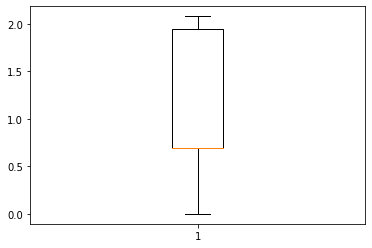

In [15]:

plt.boxplot(np.log(voto['Voto']))
plt.show()





In [16]:
voto.corr()
# Observamos relación entre variables

,ESTU,CUES,CCAA,PROV,MUN,TAMUNI,CAPITAL,DISTR,SECCION,ENTREV,Nacionalidad,SitEconomica,SitEcoAnt,SitEcoFut,SitEcoPers,SitEcoPersFutu,SitPol,SitPolAnt,SitPolFut,Problema1,Problema2,Problema3,ProPers1,ProPers2,ProPers3,Ideologia1,Ideologia2,IdeoPSOE,IdeoPP,IdeoVox,IdeoPodemos,IdeoIU,IdeoCs,IdeoMP,InteresPol,interesCampa,DemocraciaoAuto,SitEcopostelecc,Vecinal,Protesta,...,C6,C7,C7A,C8,C9,C10,C11,C11A,C12,C12A,C13,C13A,C14,C15,C16,C17,C17A,C18,C19,C20,C21,TELF,MEDITA,COMPRENS,TARJETAS,LUGAR,DESARROLLO,TERCERASPERSONAS,INTERVENCION,DURACION,B21ACOM,B22R,C1R,C1AR,VOTOSIMG,C7AR,RECUERDO,ESTUDIOS,RAMA09,CLASESUB
ESTU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUES,NaN,1.000000,0.104858,-0.052791,-0.030066,0.036880,-0.099761,NaN,NaN,NaN,0.012333,0.019859,0.020725,-0.030225,-0.002777,-0.015162,0.009647,0.013064,0.000558,0.020978,-0.005951,0.004809,-0.014031,-0.008731,0.012375,0.019614,0.070328,-0.006517,0.003806,-0.011351,-0.001380,-0.019976,-0.014017,-0.013725,0.022620,0.044295,0.004105,-0.001043,0.024974,0.056272,...,0.008122,0.015103,0.001696,-0.009822,-0.013452,-0.012406,-0.022425,0.011934,0.011110,-0.009926,0.014402,-0.005175,-0.011107,0.021658,-0.009423,-0.009597,-0.007124,-0.007084,-0.005203,0.016963,0.007956,0.064507,-0.022477,-0.020978,0.099645,0.005939,0.040847,0.004390,-0.006191,-0.058364,-0.011156,-0.045513,0.028305,-0.003268,0.016322,0.002612,0.026658,-0.010050,0.008350,-0.019768
CCAA,NaN,0.104858,1.000000,0.067828,-0.055519,0.086857,-0.168527,NaN,NaN,NaN,0.058766,-0.040124,-0.021436,-0.036246,-0.046075,-0.047680,0.002223,-0.060405,-0.034616,0.041071,0.004384,0.010952,0.036748,0.036807,0.032020,-0.054895,-0.018048,-0.037256,-0.074844,-0.046329,-0.042046,-0.043390,-0.038874,-0.100093,-0.011726,0.015823,-0.024359,-0.023797,-0.009395,-0.034450,...,0.037160,0.017108,0.014447,0.006223,-0.006185,-0.016033,0.067483,0.029663,-0.002838,0.018142,-0.036659,-0.022445,0.025382,-0.051684,-0.065547,-0.052433,0.021478,-0.012554,0.072214,0.070776,0.013902,-0.009080,-0.028100,-0.036718,-0.012129,0.027475,-0.011109,-0.001636,-0.003533,0.013860,0.021696,0.038714,0.009292,-0.016676,0.037670,0.014629,0.020856,0.065519,-0.012773,-0.046327
PROV,NaN,-0.052791,0.067828,1.000000,0.293619,0.089052,-0.238912,NaN,NaN,NaN,-0.000837,-0.032430,-0.016575,0.000060,-0.043607,-0.027108,0.015071,0.024442,0.011213,-0.011223,0.002222,0.086825,0.029104,0.086554,0.083239,-0.031165,-0.003219,-0.008913,-0.036623,-0.070411,-0.034427,-0.008777,-0.027171,-0.060683,-0.031120,-0.001285,0.006285,0.025021,0.005857,0.023908,...,-0.026784,0.005536,0.019434,-0.028708,-0.000869,-0.013908,0.029682,0.016766,-0.056726,0.073066,-0.006488,0.021842,0.000203,0.019709,-0.003003,-0.027508,-0.019056,0.040209,-0.025594,-0.058139,-0.013063,0.007440,-0.050570,-0.041028,-0.001215,0.054198,0.007492,-0.022935,0.027992,-0.078685,0.013362,0.033362,0.037857,0.015681,0.028400,0.022474,0.022705,0.054933,0.035202,-0.072358
MUN,NaN,-0.030066,-0.055519,0.293619,1.000000,0.549859,-0.557306,NaN,NaN,NaN,-0.001502,-0.019421,0.004953,0.003098,-0.022621,-0.015115,-0.027798,0.010206,0.029773,0.018599,-0.018232,-0.001904,0.061879,0.079427,0.083943,-0.037082,-0.070260,-0.064650,-0.071551,-0.072483,-0.057051,-0.054751,-0.047372,-0.050703,-0.052030,-0.002846,-0.020002,0.018741,-0.046472,-0.046063,...,0.020834,0.001078,0.019291,-0.004247,0.017317,0.070694,0.012908,0.085559,0.010217,-0.003766,0.027991,0.019618,0.043227,-0.034291,-0.030538,-0.046598,0.023400,0.095032,0.022618,0.057744,-0.024943,-0.012527,-0.010656,-0.013408,0.033577,0.009245,0.047282,-0.017880,0.020232,0.027837,-0.015165,0.012406,0.039885,-0.017088,0.004827,0.020145,0.014314,0.095667,0.135364,-0.082049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

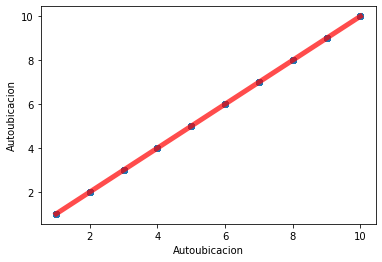

In [17]:
# Hacemos un boxplot para ver si hay outliers
attributes = [ "Autoubicacion"]

for i in attributes:
    sns.regplot(x=voto[i], y=voto["Autoubicacion"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.xlabel(i)
    plt.show()

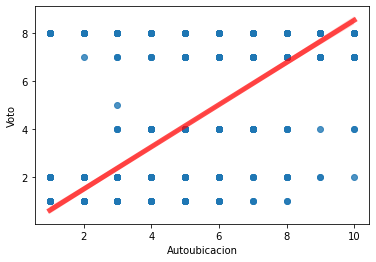

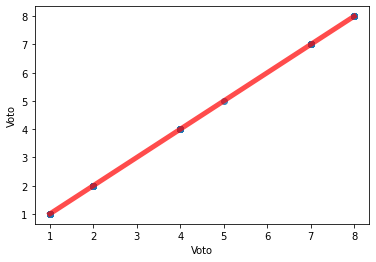

In [18]:
# Hacemos un boxplot para ver si hay outliers
attributes = ["Autoubicacion", "Voto"]

for i in attributes:
    sns.regplot(x=voto[i], y=voto["Voto"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.xlabel(i)
    plt.show()

In [19]:
voto.dtypes

ESTU         int64
CUES         int64
CCAA         int64
PROV         int64
MUN          int64
             ...  
RECUERDO     int64
ESTUDIOS     int64
RAMA09       int64
CLASESUB     int64
PESO        object
Length: 306, dtype: object

In [20]:
voto.columns

Index(['ESTU', 'CUES', 'CCAA', 'PROV', 'MUN', 'TAMUNI', 'CAPITAL', 'DISTR',
       'SECCION', 'ENTREV',
       ...
       'B22R', 'C1R', 'C1AR', 'VOTOSIMG', 'C7AR', 'RECUERDO', 'ESTUDIOS',
       'RAMA09', 'CLASESUB', 'PESO'],
      dtype='object', length=306)

<Figure size 1440x720 with 0 Axes>

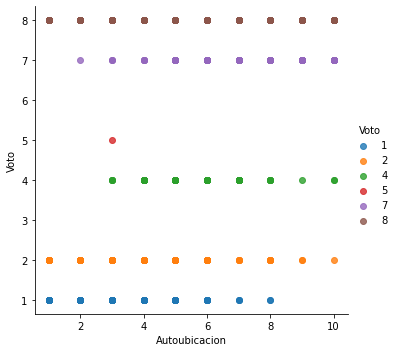

In [21]:
# Miramos alguna interacción que nos de buena vibra
plt.figure(figsize=(20,10))
sns.lmplot(x="Autoubicacion", y="Voto", data=voto, fit_reg=False, hue="Voto", legend=True)
plt.show()

# sns.lmplot( x="co2", y="displ", data=cars, fit_reg=False, hue='fuel_group', legend=True)
# plt.legend(loc='lower right')
# plt.show()



[0        True
1       False
2       False
3        True
4       False
        ...  
2858    False
2859    False
2860    False
2861    False
2862    False
Name: Voto, Length: 2863, dtype: bool]


<Figure size 1440x720 with 0 Axes>

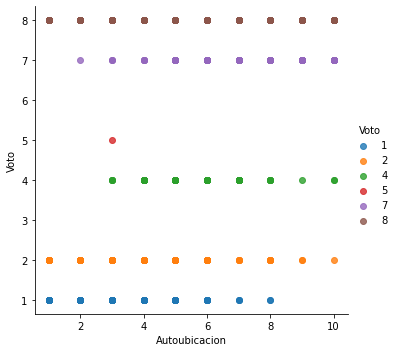

In [22]:
votoPSOE=[voto["Voto"]==2]

print(votoPSOE)
plt.figure(figsize=(20,10))
sns.lmplot(x="Autoubicacion", y="Voto", data=voto, fit_reg=False, hue="Voto", legend=True)
plt.show()

In [23]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# regresión lineal

In [25]:
voto["Autoubicacion"].describe()



count    2863.000000
mean        4.807195
std         2.112620
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: Autoubicacion, dtype: float64

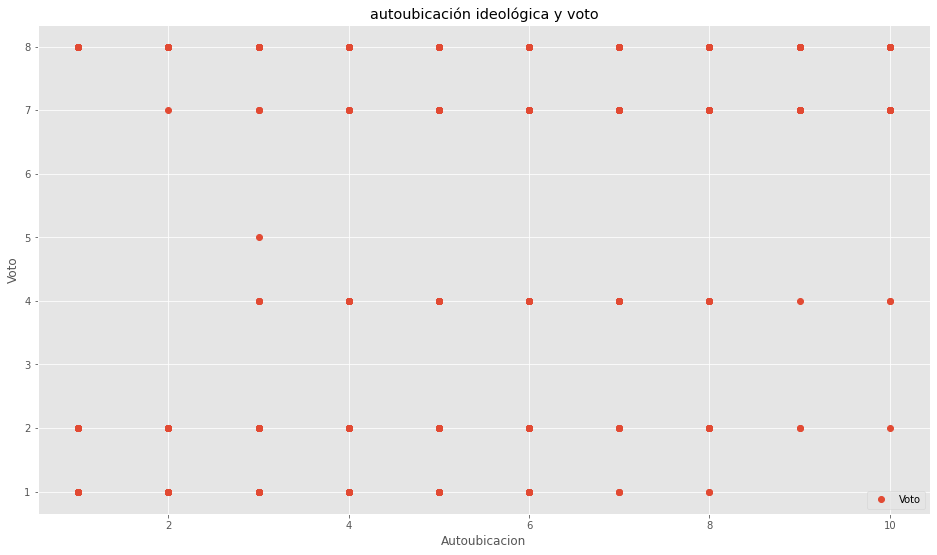

In [26]:
voto.plot(x="Autoubicacion", y="Voto", style='o')
plt.title("autoubicación ideológica y voto") 
plt.xlabel("Autoubicacion") 
plt.ylabel("Voto") 
plt.show()

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
from scipy.stats import pearsonr

In [29]:
corr_test = pearsonr(x = voto["Autoubicacion"], y = voto["Voto"])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


Coeficiente de correlación de Pearson:  0.6798425179071123
P-value:  0.0


In [30]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


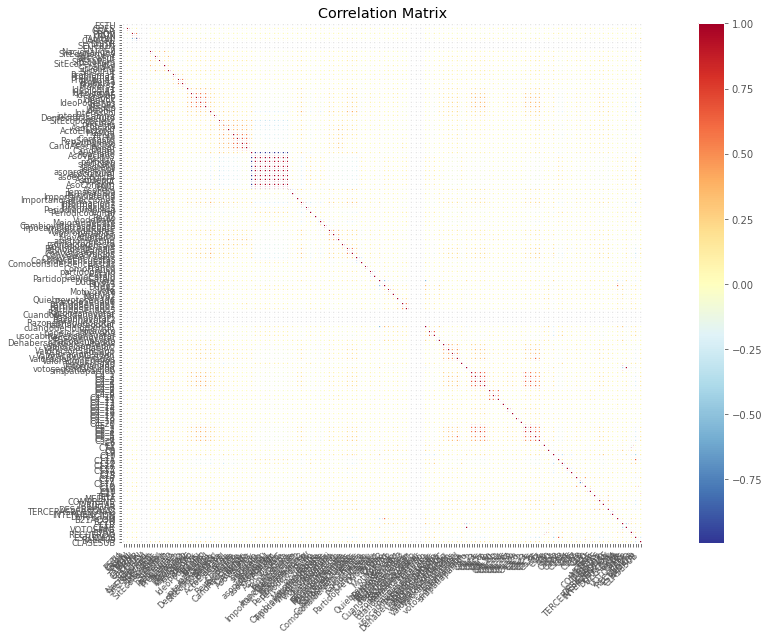

In [31]:
corr = voto.set_index("Autoubicacion").corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

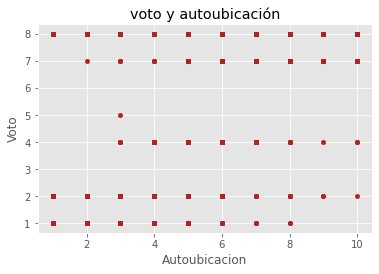

In [32]:
fig, ax = plt.subplots(figsize=(6, 3.84))

voto.plot(
    x    = "Autoubicacion",
    y    = "Voto",
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title("voto y autoubicación");

In [33]:
X = voto[["Autoubicacion"]]
y = voto["Voto"]

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [34]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-0.26302316]
Coeficiente: [('Autoubicacion', 0.878669111682699)]
Coeficiente de determinación R^2: 0.46216830280864896


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [35]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[4.1303224 ]
 [5.88766062]
 [3.25165329]]

El error (rmse) de test es: 2.0244896454256716


In [36]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [37]:

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
# modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     1979.
Date:                Sun, 27 Feb 2022   Prob (F-statistic):          4.94e-312
Time:                        22:25:04   Log-Likelihood:                -4826.9
No. Observations:                2290   AIC:                             9658.
Df Residuals:                    2288   BIC:                             9669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2630      0.104     -2.528      0.0

In [38]:
modelo.conf_int(alpha=0.05)

array([[-0.46708073, -0.05896559],
       [ 0.83994061,  0.91739761]])

In [39]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.251653,0.044736,3.163927,3.339380,-0.656286,7.159593
1,2.372984,0.055117,2.264900,2.481068,-1.535465,6.281434
2,0.615646,0.086321,0.446371,0.784921,-3.294974,4.526266
3,3.251653,0.044736,3.163927,3.339380,-0.656286,7.159593


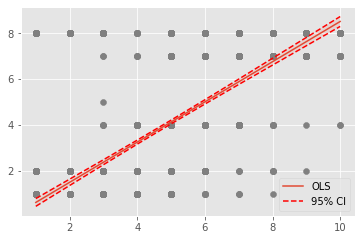

In [40]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [41]:

diferenciaco2=voto["Autoubicacion"].diff()

diferenciaco2.mean()


-0.0006988120195667365

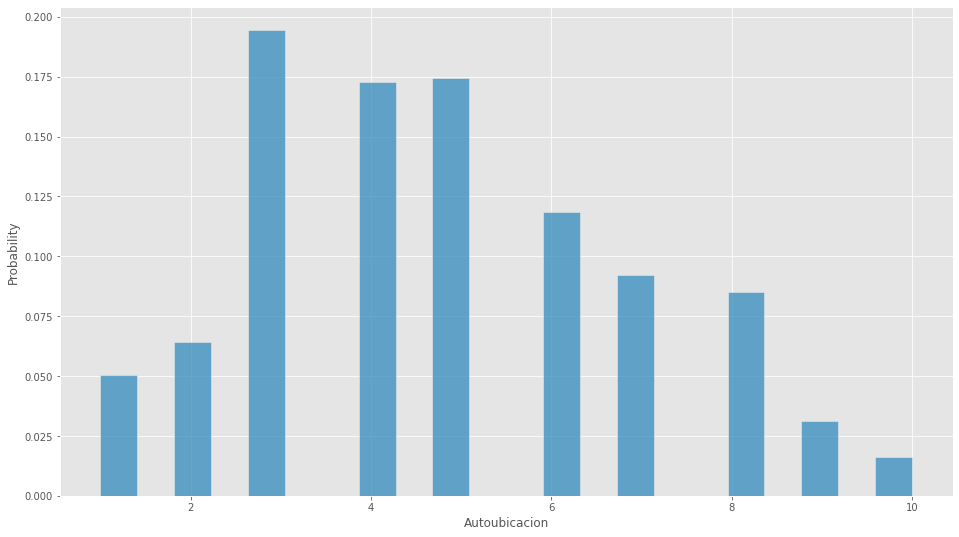

In [42]:
sns.histplot(data = voto["Autoubicacion"], x = voto["Autoubicacion"], stat = "probability")

In [43]:
votoagrupado=voto.groupby(voto["Voto"])

votoagrupado.describe()

ESTU                               ... CLASESUB                    
       count    mean  std     min     25%  ...      min  25%  50%  75%  max
Voto                                       ...                             
1      491.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  3.0  4.0  9.0
2     1091.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  3.0  4.0  9.0
4      235.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  9.0
5        1.0  3269.0  NaN  3269.0  3269.0  ...      4.0  4.0  4.0  4.0  4.0
7      607.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  9.0
8      438.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  9.0

[6 rows x 1624 columns]

In [45]:
votoporubicacion=voto.groupby(voto["Autoubicacion"])

votoporubicacion.describe()

ESTU                               ... CLASESUB                    
               count    mean  std     min     25%  ...      min  25%  50%  75%  max
Autoubicacion                                      ...                             
1              145.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  3.0  4.0  8.0
2              184.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  8.0
3              557.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  4.0  9.0
4              495.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  3.0  4.0  8.0
5              499.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  4.0  9.0
6              339.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  8.0
7              264.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  9.0
8              244.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  9.0
9               90.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  8.0
10              46.0  3269.0  0.0  3269.0  3269.0  ...      1.0  2.0  2.0  3.0  9.0

[10 rows x 1624 columns]

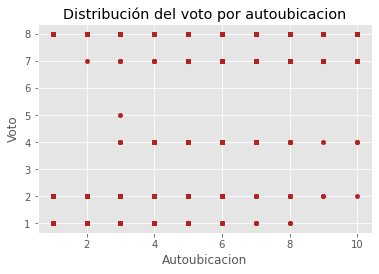

In [46]:
fig, ax = plt.subplots(figsize=(6, 3.84))

votoagrupado.plot(
    x    = "Autoubicacion",
    y    = "Voto",
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución del voto por autoubicacion');

In [59]:
votoeideologia=voto.groupby(voto["Voto"])["Autoubicacion"].mean()

votoeideologia.head()

Voto
1    2.928717
2    3.770852
4    5.638298
5    3.000000
7    6.887974
Name: Autoubicacion, dtype: float64

In [69]:
nuevovoto=pd.DataFrame(voto.groupby(["Voto"])["Autoubicacion"].mean())

In [70]:
nuevovoto

,Autoubicacion
Voto,
1,2.928717
2,3.770852
4,5.638298
5,3.000000
7,6.887974
8,6.168950


KeyError: ignored

In [ ]:

cars.make.value_counts(normalize=True)

#plot the bar graph
cars.make.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
cars.year.value_counts(normalize=True)

#plot the bar graph
cars.year.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
#plot the scatter plot
plt.scatter(cars.year,cars.co2)
plt.show()

#plot the scatter plot of balance and age variable in data
cars.plot.scatter(x="year",y="co2")
plt.show()

In [ ]:
#plot the scatter plot
plt.scatter(cars.displ,cars.co2)
plt.show()

#plot the scatter plot of balance and age variable in data
cars.plot.scatter(x="displ",y="co2")
plt.show()

In [ ]:
cars.groupby(["make", "year"]).mean()

In [47]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 6.5 MB/s 


In [48]:
import sweetviz as sv
report = sv.analyze(voto, target_feat = "Autoubicacion")
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

PAIRWISE CALCULATION LENGTH WARNING: There are 306 features in this dataframe and the 'pairwise_analysis' parameter is set to 'auto'.
Pairwise analysis is exponential in length: 306 features will cause ~93636 pairs to be evaluated, which could take a long time.

You must call the function with the parameter pairwise_analysis='on' or 'off' to explicitly select desired behavior.


AttributeError: ignored